# Preliminaries

In [1]:
!pip install statsmodels

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels import datasets
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from sklearn.ensemble import IsolationForest
from statsmodels.tsa.stattools import adfuller

In [3]:
df = pd.read_csv(r"C:\Users\ejanv\Downloads\RTD Self-Scheduled Nominations\consolidated_csv_selfsched_01BAKUN_G01.csv")
df.head()

,RUN_TIME,MKT_TYPE,REGION_NAME,ZONE_NAME,RESOURCE_NAME,TIME_INTERVAL,START_TIME,END_TIME,MP_NAME,SELF_SCHED_MW,Unnamed: 10
0,06/26/2021,RTD,CLUZ,NLUZON,01BAKUN_G01,06/26/2021 12:05:00 AM,06/26/2021,06/26/2021 12:05:00 AM,NR,33.0,NaN
1,06/26/2021,RTD,CLUZ,NLUZON,01BAKUN_G01,06/26/2021 12:05:00 AM,06/26/2021,06/26/2021 12:05:00 AM,NR,33.0,NaN
2,06/26/2021 12:05:00 AM,RTD,CLUZ,NLUZON,01BAKUN_G01,06/26/2021 12:10:00 AM,06/26/2021 12:05:00 AM,06/26/2021 12:10:00 AM,NR,33.0,NaN
3,06/26/2021 12:05:00 AM,RTD,CLUZ,NLUZON,01BAKUN_G01,06/26/2021 12:10:00 AM,06/26/2021 12:05:00 AM,06/26/2021 12:10:00 AM,NR,33.0,NaN
4,06/26/2021 12:10:00 AM,RTD,CLUZ,NLUZON,01BAKUN_G01,06/26/2021 12:15:00 AM,06/26/2021 12:10:00 AM,06/26/2021 12:15:00 AM,NR,33.0,NaN


# Data Preprocessing

In [4]:
# transform date column into a datetime column
df['RUN_TIME'] = pd.to_datetime(df['RUN_TIME'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
df.head()

,RUN_TIME,MKT_TYPE,REGION_NAME,ZONE_NAME,RESOURCE_NAME,TIME_INTERVAL,START_TIME,END_TIME,MP_NAME,SELF_SCHED_MW,Unnamed: 10
0,NaT,RTD,CLUZ,NLUZON,01BAKUN_G01,06/26/2021 12:05:00 AM,06/26/2021,06/26/2021 12:05:00 AM,NR,33.0,NaN
1,NaT,RTD,CLUZ,NLUZON,01BAKUN_G01,06/26/2021 12:05:00 AM,06/26/2021,06/26/2021 12:05:00 AM,NR,33.0,NaN
2,2021-06-26 00:05:00,RTD,CLUZ,NLUZON,01BAKUN_G01,06/26/2021 12:10:00 AM,06/26/2021 12:05:00 AM,06/26/2021 12:10:00 AM,NR,33.0,NaN
3,2021-06-26 00:05:00,RTD,CLUZ,NLUZON,01BAKUN_G01,06/26/2021 12:10:00 AM,06/26/2021 12:05:00 AM,06/26/2021 12:10:00 AM,NR,33.0,NaN
4,2021-06-26 00:10:00,RTD,CLUZ,NLUZON,01BAKUN_G01,06/26/2021 12:15:00 AM,06/26/2021 12:10:00 AM,06/26/2021 12:15:00 AM,NR,33.0,NaN


In [5]:
# # Filtering the dataset to see 2023
# df = df[(df['RUN_TIME'].dt.year == 2023)]
# df.head()

In [6]:
duplicate_labels = df.index[df.index.duplicated()]
print("Duplicate Labels:", duplicate_labels)

Duplicate Labels: Index([], dtype='int64')


In [7]:
df = df[~df.index.duplicated(keep='first')]
df.head()

,RUN_TIME,MKT_TYPE,REGION_NAME,ZONE_NAME,RESOURCE_NAME,TIME_INTERVAL,START_TIME,END_TIME,MP_NAME,SELF_SCHED_MW,Unnamed: 10
0,NaT,RTD,CLUZ,NLUZON,01BAKUN_G01,06/26/2021 12:05:00 AM,06/26/2021,06/26/2021 12:05:00 AM,NR,33.0,NaN
1,NaT,RTD,CLUZ,NLUZON,01BAKUN_G01,06/26/2021 12:05:00 AM,06/26/2021,06/26/2021 12:05:00 AM,NR,33.0,NaN
2,2021-06-26 00:05:00,RTD,CLUZ,NLUZON,01BAKUN_G01,06/26/2021 12:10:00 AM,06/26/2021 12:05:00 AM,06/26/2021 12:10:00 AM,NR,33.0,NaN
3,2021-06-26 00:05:00,RTD,CLUZ,NLUZON,01BAKUN_G01,06/26/2021 12:10:00 AM,06/26/2021 12:05:00 AM,06/26/2021 12:10:00 AM,NR,33.0,NaN
4,2021-06-26 00:10:00,RTD,CLUZ,NLUZON,01BAKUN_G01,06/26/2021 12:15:00 AM,06/26/2021 12:10:00 AM,06/26/2021 12:15:00 AM,NR,33.0,NaN


In [8]:
df = df[['RUN_TIME', 'SELF_SCHED_MW']]

In [9]:
# Get max value per day
data_max = df.groupby(df['RUN_TIME'].dt.date)['SELF_SCHED_MW'].agg(['max']).reset_index()
data_max.columns = ['Date', 'max_SELF_SCHED_MW']
data_max['Date'] = pd.to_datetime(data_max['Date'])
data_max.set_index('Date', inplace=True)
data_max.head()

,max_SELF_SCHED_MW
Date,
2021-06-26,44.0
2021-06-27,46.0
2021-06-28,36.0
2021-06-29,46.0
2021-06-30,30.0


In [10]:
data_max.isnull().any()

max_SELF_SCHED_MW    False
dtype: bool

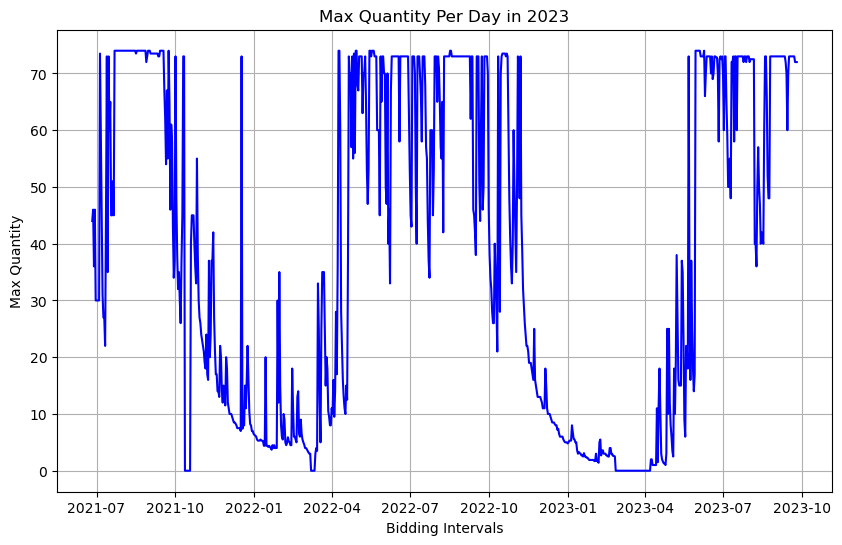

In [11]:
# Plot the time series as a line plot
plt.figure(figsize=(10, 6))
plt.plot(data_max, linestyle='-', color='b', label='Max Quantity')
plt.title('Max Quantity Per Day in 2023')
plt.xlabel('Bidding Intervals')
plt.ylabel('Max Quantity')
plt.grid(True)
plt.show()

# Stationarity Test

In [12]:
def adf_test(data):
    adf_test = adfuller(data)
    adf_result = pd.Series(adf_test[0:4], index=['Test Statistic','p-value','N Lags Used',\
                                                'N Observations Used'])
    for key,value in adf_test[4].items():
            adf_result['Critical Value (%s)'%key] = value

    return adf_result

In [13]:
adf_test(data_max.diff()[1:])

Test Statistic         -1.346152e+01
p-value                 3.522290e-25
N Lags Used             8.000000e+00
N Observations Used     8.110000e+02
Critical Value (1%)    -3.438439e+00
Critical Value (5%)    -2.865110e+00
Critical Value (10%)   -2.568671e+00
dtype: float64

In [14]:
# final_df_daily passed the test. Conlusion: Stationary

# Checking Trend

In [15]:
# Set window (the higher the window value, the smoother the graph)
WINDOW = 30
rolling_df = data_max.rolling(WINDOW).mean().shift(1)
rolling_df

,max_SELF_SCHED_MW
Date,
2021-06-26,NaN
2021-06-27,NaN
2021-06-28,NaN
2021-06-29,NaN
2021-06-30,NaN
...,...
2023-09-21,69.966667
2023-09-22,70.666667
2023-09-23,71.500000


Text(0, 0.5, 'Maximum Capacity')

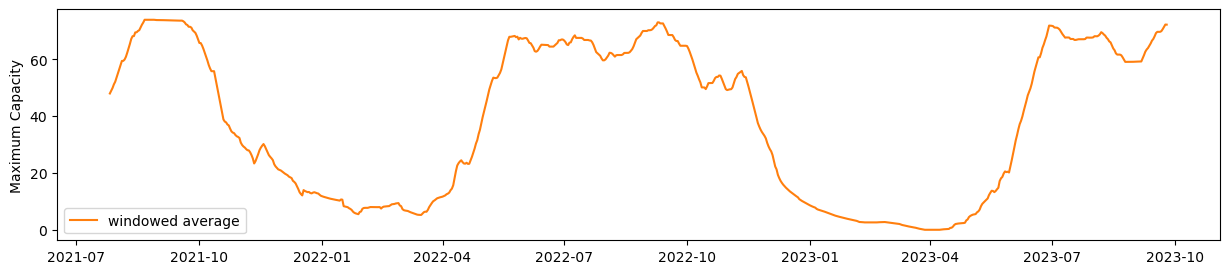

In [16]:
# plot the forecast
fig = plt.figure(figsize=(15,3))
plt.plot(rolling_df, color='C1', label='windowed average')
plt.legend()
plt.ylabel("Maximum Capacity")

In [17]:
WINDOW = 7
rolling_df2 = rolling_df.rolling(WINDOW).mean().shift(1)
rolling_df2

,max_SELF_SCHED_MW
Date,
2021-06-26,NaN
2021-06-27,NaN
2021-06-28,NaN
2021-06-29,NaN
2021-06-30,NaN
...,...
2023-09-21,68.652381
2023-09-22,69.128571
2023-09-23,69.619048


Text(0, 0.5, 'Maximum Capacity')

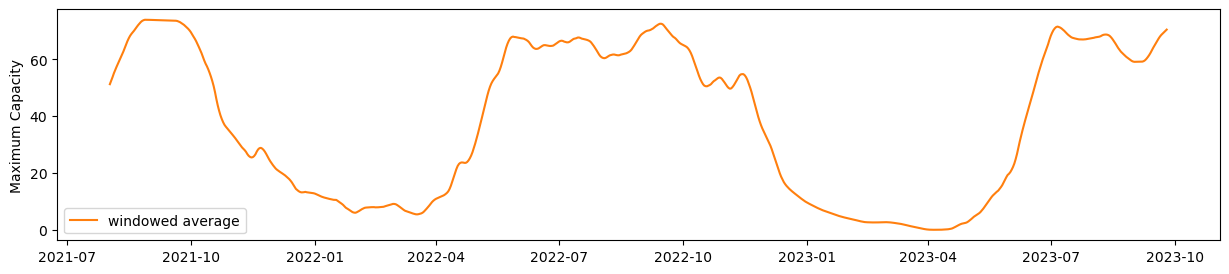

In [18]:
# plot the forecast
fig = plt.figure(figsize=(15,3))
plt.plot(rolling_df2, color='C1', label='windowed average')
plt.legend()
plt.ylabel("Maximum Capacity")

# Forecasting (Prophet)

In [19]:
#split dataset to training and test sets
train_df = data_max['2021-01-01':'2023-06-30']
test_df = data_max['2023-07-01':'2023-09-25']

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def show_errors(y_true, y_pred):
    return pd.DataFrame({'RMSE': root_mean_squared_error(y_true,y_pred),\
                                            'MAE':mean_absolute_error(y_true,y_pred),\
                                            'MAPE': mean_absolute_percentage_error(y_true,y_pred)}, index=[0])

In [21]:
!pip install prophet

In [22]:
from prophet import Prophet

In [23]:
# Create Prophet model
model = Prophet()

# Rename the columns to fit Prophet's requirements
input_df = train_df.copy().reset_index()
input_df = input_df.rename(columns={'Date': 'ds', 'max_SELF_SCHED_MW': 'y'})

# Fit model to data
model.fit(input_df)

11:25:09 - cmdstanpy - INFO - Chain [1] start processing
11:25:09 - cmdstanpy - INFO - Chain [1] done processing


In [24]:
# Generate future predictions
future = model.make_future_dataframe(periods=len(test_df))

# Make predictions
forecast = model.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-06-26,31.262854,42.855535,76.226180,31.262854,31.262854,27.927237,27.927237,27.927237,-0.721582,-0.721582,-0.721582,28.648819,28.648819,28.648819,0.0,0.0,0.0,59.190091
1,2021-06-27,31.299732,42.075057,76.599508,31.299732,31.299732,27.250132,27.250132,27.250132,0.020195,0.020195,0.020195,27.229937,27.229937,27.229937,0.0,0.0,0.0,58.549864
2,2021-06-28,31.336610,41.972311,76.614701,31.336610,31.336610,27.490570,27.490570,27.490570,1.658333,1.658333,1.658333,25.832237,25.832237,25.832237,0.0,0.0,0.0,58.827180
3,2021-06-29,31.373487,39.061337,71.721471,31.373487,31.373487,24.592106,24.592106,24.592106,0.115617,0.115617,0.115617,24.476489,24.476489,24.476489,0.0,0.0,0.0,55.965594
4,2021-06-30,31.410365,36.500531,70.397955,31.410365,31.410365,22.253026,22.253026,22.253026,-0.929178,-0.929178,-0.929178,23.182203,23.182203,23.182203,0.0,0.0,0.0,53.663391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
816,2023-09-21,20.163169,28.768501,62.342391,19.719981,20.589381,24.523845,24.523845,24.523845,-0.468478,-0.468478,-0.468478,24.992322,24.992322,24.992322,0.0,0.0,0.0,44.687013
817,2023-09-22,20.114244,27.495658,60.693111,19.658738,20.549870,23.924282,23.924282,23.924282,0.325093,0.325093,0.325093,23.599189,23.599189,23.599189,0.0,0.0,0.0,44.038526
818,2023-09-23,20.065320,23.701935,58.212423,19.596684,20.510306,21.437286,21.437286,21.437286,-0.721582,-0.721582,-0.721582,22.158868,22.158868,22.158868,0.0,0.0,0.0,41.502605
819,2023-09-24,20.016395,23.446085,58.249248,19.534813,20.469804,20.702951,20.702951,20.702951,0.020195,0.020195,0.020195,20.682757,20.682757,20.682757,0.0,0.0,0.0,40.719347


In [25]:
forecast_df = forecast[['ds','yhat']].rename(columns={'ds':'date','yhat1':'streams'}).set_index('date')['2023-07-01':]
forecast_df

,yhat
date,
2023-07-01,46.017176
2023-07-02,45.541012
2023-07-03,46.064030
2023-07-04,43.521996
2023-07-05,41.604394
...,...
2023-09-21,44.687013
2023-09-22,44.038526
2023-09-23,41.502605


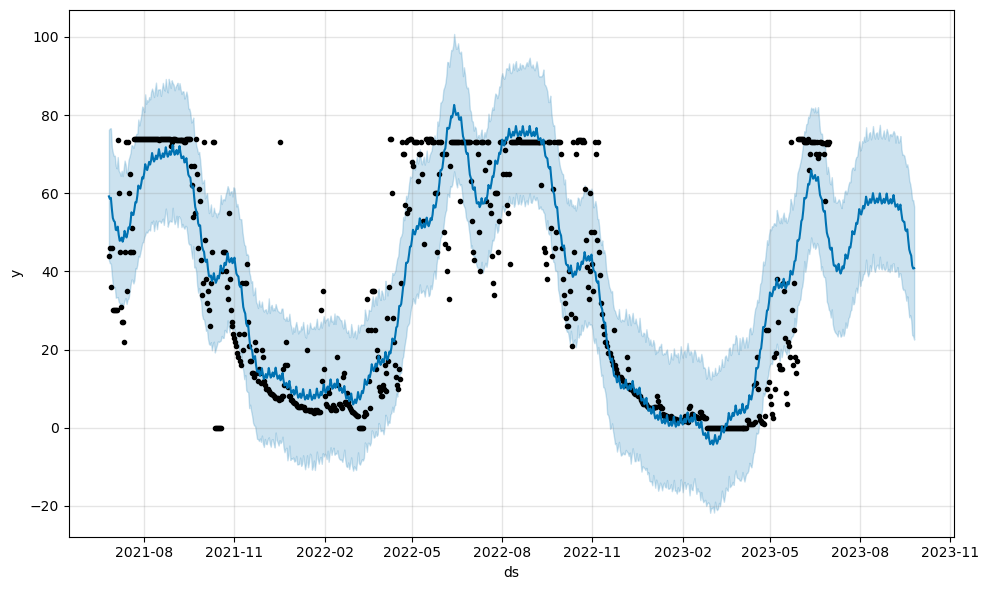

In [30]:
fig1 = model.plot(forecast)

Text(0, 0.5, 'Daily Max Capacity')

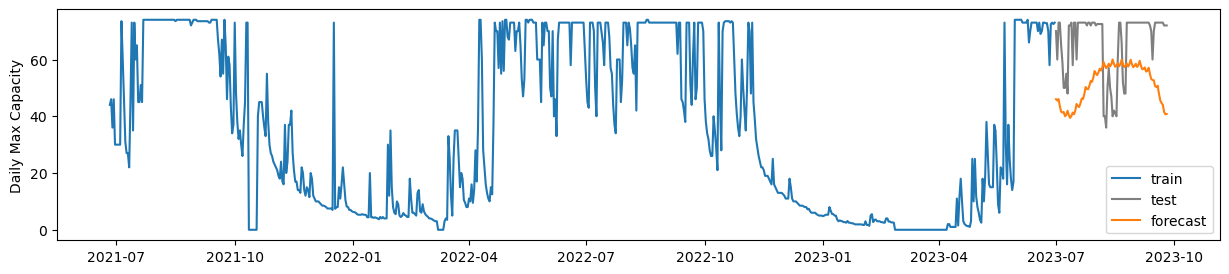

In [26]:
# plot the forecast results
fig = plt.figure(figsize=(15,3))

plt.plot(train_df, color='C0', label='train')
plt.plot(test_df, color='C7', label='test')
plt.plot(forecast_df, color='C1', label='forecast')
plt.legend()
plt.ylabel("Daily Max Capacity")

In [27]:
show_errors(test_df,forecast_df)

,RMSE,MAE,MAPE
0,20.080501,18.677611,28.382072


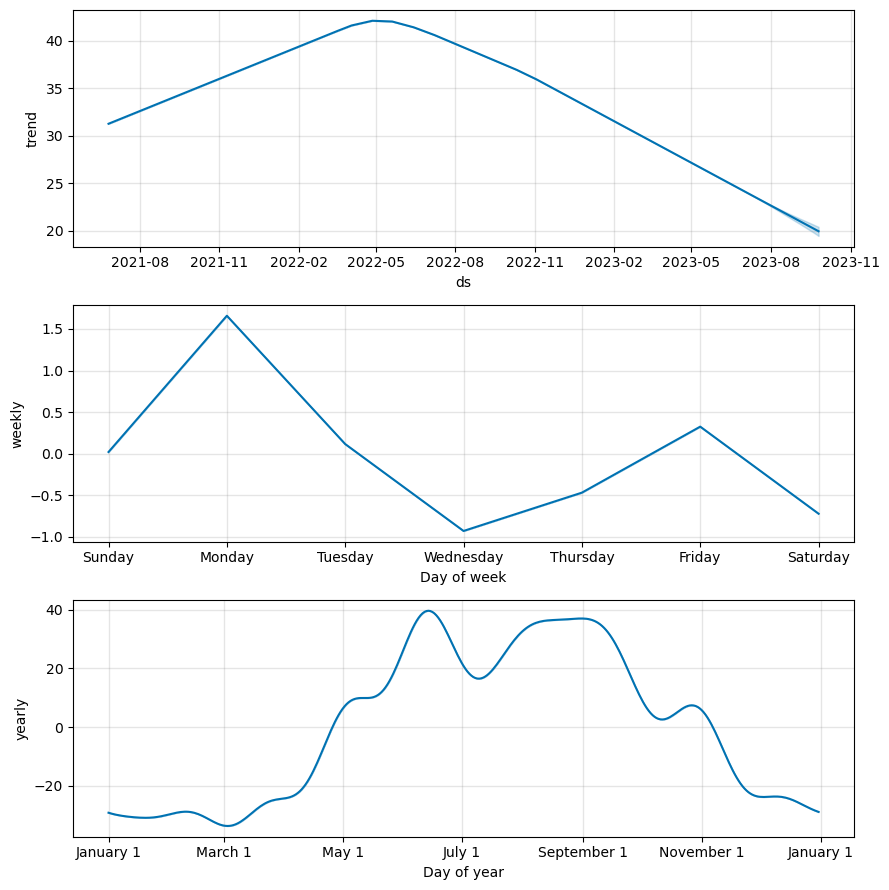

In [28]:
fig_components = model.plot_components(forecast)

# Final approach

In [29]:
# Drop columns
# Fill NaNs
# Filter to 2023 data
# Normalize quantity values
# Get max capacity per bidding interval
# Daily aggregation
# TSL decomposition
# Stationary test
# Train-test split
# Neural netrok approach